In [1]:
from MyMatrixWrapper import Matrix
import torch
from torch import nn
import numpy as np
from PIL import Image
torch.cuda.is_available()

True

In [2]:
kernel = Matrix.from_ndarray(np.array([[0, -1, 0], 
     [-1, 5, -1],  
     [0, -1, 0]], dtype=np.float32))

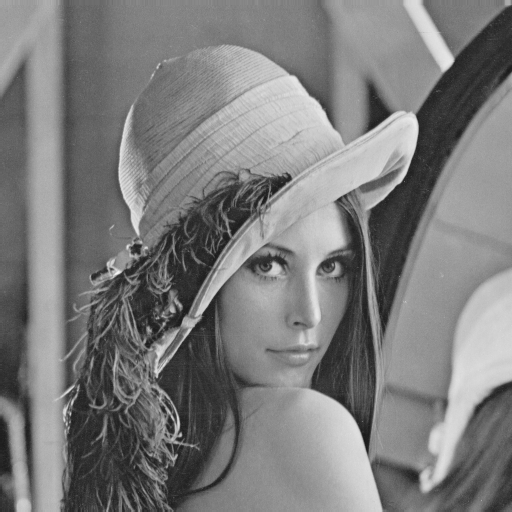

array([[162., 162., 162., ..., 170., 155., 128.],
       [162., 162., 162., ..., 170., 155., 128.],
       [162., 162., 162., ..., 170., 155., 128.],
       ...,
       [ 43.,  43.,  50., ..., 104., 100.,  98.],
       [ 44.,  44.,  55., ..., 104., 105., 108.],
       [ 44.,  44.,  55., ..., 104., 105., 108.]], dtype=float32)

In [3]:
im = np.array(Image.open('lena.png').convert('L'), dtype=np.float32)
display(Image.fromarray(im.astype(np.uint8)))
im

In [4]:
mat = Matrix.from_ndarray(im)

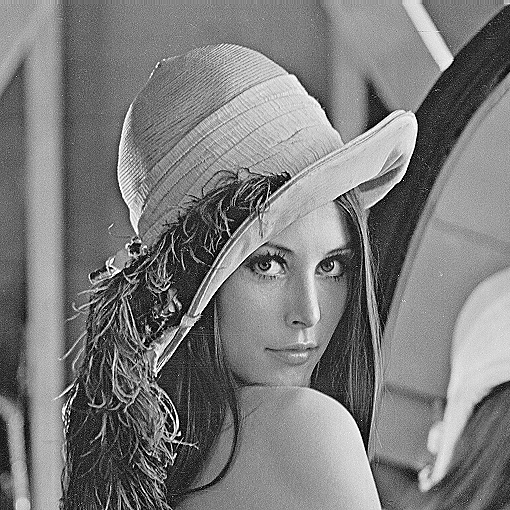

In [5]:
result = mat.conv(kernel)
display(Image.fromarray(result.to_ndarray().clip(0, 255).astype(np.uint8)))

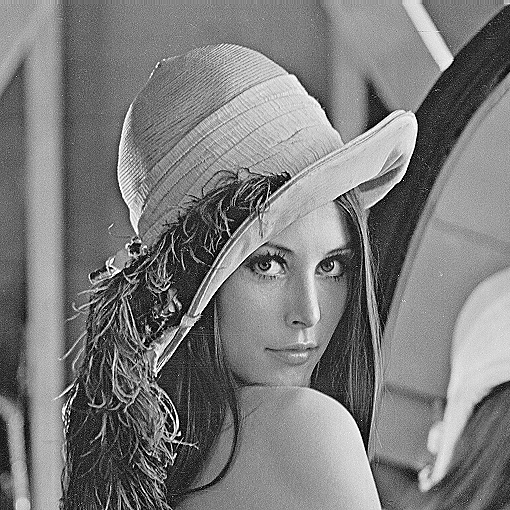

Output Shape : torch.Size([1, 1, 510, 510])
Output 
 tensor([[[[162., 163., 159.,  ..., 173., 184., 167.],
          [162., 163., 159.,  ..., 173., 184., 167.],
          [162., 163., 159.,  ..., 173., 184., 167.],
          ...,
          [ 37.,  56.,  54.,  ..., 115., 115.,  98.],
          [ 32.,  55.,  30.,  ...,  99., 114.,  95.],
          [ 34.,  75.,  48.,  ...,  91., 107., 108.]]]])


In [6]:
# Define the filter 
torch_kernel = torch.tensor( 
    [[0, -1, 0], 
     [-1, 5, -1],  
     [0, -1, 0]], dtype=torch.float32)[None, None, :, :]

# Define the bias 
bias = torch.tensor([0], dtype=torch.float32) 
  
# Define the input image 
image = torch.from_numpy(im)[None,None,:,:]
  
# Define the convolution operation 
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False) 
  
# Set the filter for the convolution operation 
conv.weight = nn.Parameter(torch_kernel) 
conv.bias = nn.Parameter(bias) 
# Apply the convolution operation 
with torch.inference_mode(True):
    output = conv(image)
display(Image.fromarray(output.clamp(0, 255).numpy(force=True).astype(np.uint8).squeeze()))
  
# Print the output 
print('Output Shape :',output.shape) 
print('Output \n',output)

In [7]:
%%timeit
with torch.inference_mode(True):
    output = conv(image)

1.35 ms ± 9.22 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
